In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import time
%matplotlib inline


In [2]:
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'


In [14]:
training = pd.read_csv('mnist_train.csv', header=None)
training_labels = training.iloc[0:60000, 0]
training_images = training.iloc[0:60000, 1:]

training_labels= training_labels.as_matrix() #to convert numpy array
training_images= training_images.as_matrix() #to convert numpy array

test = pd.read_csv('mnist_test.csv', header=None)
test_labels = test.iloc[0:10000, 0]
test_images = test.iloc[0:10000, 1:]

test_labels= test_labels.as_matrix() #to convert numpy array
test_images= test_images.as_matrix() #to convert numpy array

In [13]:
test_labels1

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [7]:
class simple_knn():
    "a simple kNN with L2 distance"

    def __init__(self):
        pass

    def train(self, X, y):
        self.training_images = X
        self.training_labels = y

    def predict(self, X, k=1):
        dists = self.compute_distances(X)
        # print("computed distances")

        num_test = dists.shape[0]
        y_pred = np.zeros(num_test)

        for i in range(num_test):
            k_closest_y = []
            labels = self.training_labels[np.argsort(dists[i,:])].flatten()
            # find k nearest lables
            k_closest_y = labels[:k]

            # out of these k nearest lables which one is most common
            # for 5NN [1, 1, 1, 2, 3] returns 1
            # break ties by selecting smaller label
            # for 5NN [1, 2, 1, 2, 3] return 1 even though 1 and 2 appeared twice.
            c = Counter(k_closest_y)
            y_pred[i] = c.most_common(1)[0][0]

        return(y_pred)

    def compute_distances(self, X):
        num_test = X.shape[0]
        num_train = self.training_images.shape[0]

        dot_pro = np.dot(X, self.X_train.T)
        sum_square_test = np.square(X).sum(axis = 1)
        sum_square_train = np.square(self.training_images).sum(axis = 1)
        dists = np.sqrt(-2 * dot_pro + sum_square_train + np.matrix(sum_square_test).T)

        return(dists)

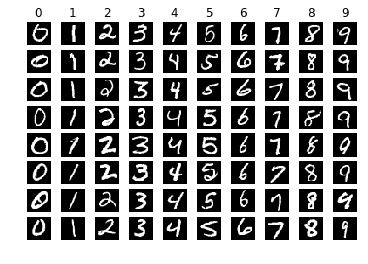

In [15]:
classes = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]
num_classes = len(classes)
samples = 8

for y, cls in enumerate(classes):
    idxs = np.nonzero([i == y for i in training_labels])
    idxs = np.random.choice(idxs[0], samples, replace=False)
    for i , idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples, num_classes, plt_idx)
        plt.imshow(training_images[idx].reshape((28, 28)))
        plt.axis("off")
        if i == 0:
            plt.title(cls)
        

plt.show()